<a href="https://www.kaggle.com/code/abhimanyunag/who-suicide-statistics-population-based-suicide?scriptVersionId=90898915" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv


**OBJECTIVE OF THE NOTEBOOK**

We will attempt to analyse the data to find a correlation between the population and number of suicides in a country over the course of time. We will ignore intra and international conflicts for now and focus solely on the numbers.

In [2]:
data = pd.read_csv("/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv")
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


We need to get rid of the NaN values for better analysis (The NaN values must be incomplete data)

In [4]:
clean_data = data.dropna()
clean_data.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


In [5]:
clean_data.info()
# No missing values now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      36060 non-null  object 
 1   year         36060 non-null  int64  
 2   sex          36060 non-null  object 
 3   age          36060 non-null  object 
 4   suicides_no  36060 non-null  float64
 5   population   36060 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [6]:
clean_data.describe()

,year,suicides_no,population
count,36060.000000,36060.000000,3.606000e+04
mean,1998.935441,221.809956,1.699996e+06
std,10.163883,855.449442,3.697811e+06
min,1979.000000,0.000000,2.590000e+02
25%,1991.000000,2.000000,8.056600e+04
50%,2000.000000,21.000000,3.757650e+05
75%,2008.000000,116.000000,1.344900e+06
max,2016.000000,22338.000000,4.380521e+07


**VISUALIZING OUR DATA WITH HISTOGRAMS AND SCATTERPLOT MATRIX**

<AxesSubplot:xlabel='sex', ylabel='Count'>

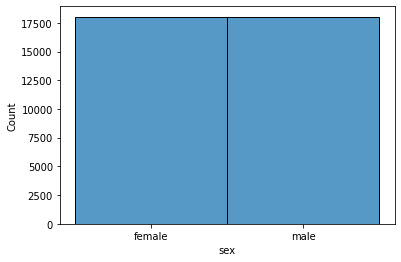

In [7]:
import seaborn as sns 

sns.histplot(data=clean_data, x="sex")
# variation is too low to consider

<AxesSubplot:xlabel='age', ylabel='Count'>

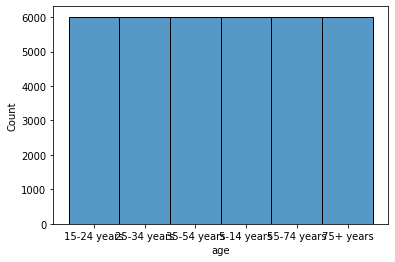

In [8]:
sns.histplot(data=clean_data, x="age")
# variation is too low to consider
# Hence we can safely ignore their effects (for now) and
# assume them to be null

<AxesSubplot:xlabel='population', ylabel='Count'>

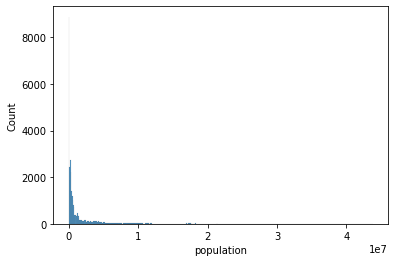

In [9]:
sns.histplot(data=clean_data, x="population")
# shows some variation
# needs a better visualization
# scatterplot matrix should help

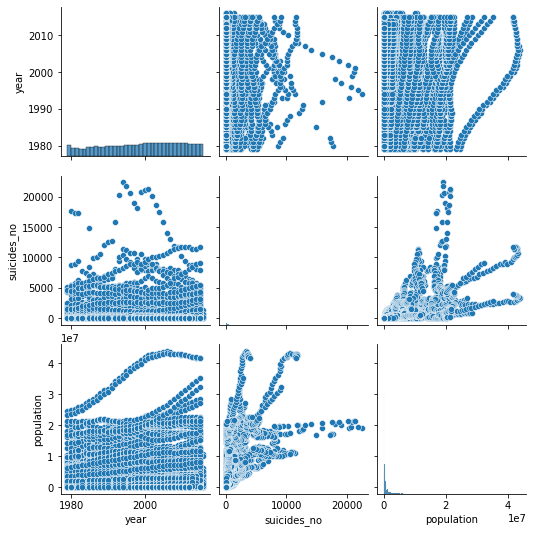

In [10]:
sns.pairplot(clean_data)
# we can try and see if there is a relationship 
# using a correlation matrix

**THE AGE GROUPS GROUPED BY GENDER**

We can group the different age groups by the two genders in the dataset 
We will take three age groups :
1. Young Adults (15-24 years)
2. Middle Aged Adults (35-54 years)
3. Senior Adults (75+ years)

They are all grouped by sex and their correlations are furthur analysed

In [11]:
age_data1 = clean_data.loc[(clean_data["age"]=="15-24 years")&(clean_data["sex"]=="male")]
age_data2 = clean_data.loc[(clean_data["age"]=="15-24 years")&(clean_data["sex"]=="female")]
age_data3 = clean_data.loc[(clean_data["age"]=="35-54 years")&(clean_data["sex"]=="male")]
age_data4 = clean_data.loc[(clean_data["age"]=="35-54 years")&(clean_data["sex"]=="female")]
age_data5 = clean_data.loc[(clean_data["age"]=="75+ years")&(clean_data["sex"]=="male")]
age_data6 = clean_data.loc[(clean_data["age"]=="75+ years")&(clean_data["sex"]=="female")]

In [12]:
age_data1.corr()
# 0.777 = measure of correlation of male young adult suicide rate with Population

,year,suicides_no,population
year,1.000000,-0.031753,-0.017836
suicides_no,-0.031753,1.000000,0.777467
population,-0.017836,0.777467,1.000000


In [13]:
age_data2.corr()
# 0.790 = measure of correlation of female young adult suicide rate with Population

,year,suicides_no,population
year,1.000000,-0.065628,-0.020926
suicides_no,-0.065628,1.000000,0.789594
population,-0.020926,0.789594,1.000000


In [14]:
age_data3.corr()
# 0.774 = measure of correlation of male middle aged adult suicide rate with Population

,year,suicides_no,population
year,1.000000,-0.002566,0.044096
suicides_no,-0.002566,1.000000,0.774419
population,0.044096,0.774419,1.000000


In [15]:
age_data4.corr()
# 0.870 = measure of correlation of female middle aged adult suicide rate with Population

,year,suicides_no,population
year,1.000000,-0.023358,0.042454
suicides_no,-0.023358,1.000000,0.870161
population,0.042454,0.870161,1.000000


In [16]:
age_data5.corr()
# 0.914 = measure of correlation of male senior adult suicide rate with Population

,year,suicides_no,population
year,1.000000,0.019731,0.086326
suicides_no,0.019731,1.000000,0.913785
population,0.086326,0.913785,1.000000


In [17]:
age_data6.corr()
# 0.705 = measure of correlation of female senior adult suicide rate with Population

,year,suicides_no,population
year,1.000000,-0.030841,0.066227
suicides_no,-0.030841,1.000000,0.705396
population,0.066227,0.705396,1.000000


We see that there is an alarming correlation between population (which contains working population as well) and the suicide rate of male senior adults. 
Keeping in mind that correlation does not imply causation, the results of this observational study can be accounted for by claiming that since senior adults might feel useless when a significant proportion of the population is involved in contributing to the economy and achieving goals. This might make them feel purposeless and less driven to live and this may turn them to suicide. 
To test my claim, a hypothesis test needs to be conducted into this.
With this study, I urge everyone to take care of senior adults around them and provide them with adequate help for mental support so that they do not become a statistic as well.

Thanks

-----

Comments about the analysis will be appreciated